In [7]:
import pandas as pd

from deepspace_helper import all_cards, all_clothing, Analyzer, SlotMachine, StarDice, Diamond

In [8]:
# 构造概率表
sd_100 = StarDice(100)
sd_50 = StarDice(50)
sd_20 = StarDice(20)
sd_10 = StarDice(10)
sd_5 = StarDice(5)

sxh_shower_card, ls_shower_card, qy_shower_card = all_cards["shower_card"]
duck_clothing, bamboo_clothing, horn_clothing = all_clothing["shower_clothing"]

chance_table = {
    sxh_shower_card: 1 / 300,
    ls_shower_card: 1 / 300,
    qy_shower_card: 1 / 300,
    duck_clothing: 0.01,
    bamboo_clothing: 0.01,
    horn_clothing: 0.01,
    sd_100: 0.04,
    sd_50: 0.12,
    sd_20: 0.15,
    sd_10: 0.5,
    sd_5: 0.15
}

In [9]:
# 构造老虎机和分析器
sm = SlotMachine(per_cost=Diamond(100), chance_table=chance_table)
ana = Analyzer(
    slot_machine=sm
)

## 按给定投入实验

沈星回: 0.292


<Axes: >

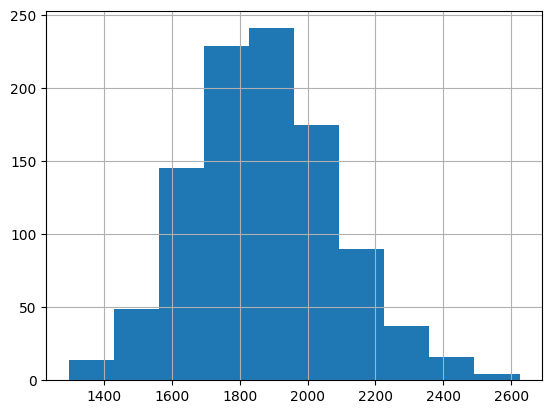

In [32]:
n_samples = 1000
result_df = ana.roll_by_coins(10000, n_samples=n_samples)

# 查看出货概率
sxh_ratio = len(result_df[result_df[sxh_shower_card] >= 1]) / n_samples
print("沈星回:", sxh_ratio)

# 画图
result_df[StarDice(1)].hist()

## 按给定目标实验

In [33]:
# 设定目标
target = {
    sxh_shower_card: 1,
    ls_shower_card: 1,
    qy_shower_card: 1,
}

In [34]:
# 朴素计算
naive_result = ana.roll_by_target_naive(
    target,
    step=10,
    n_samples=1000
)
print("naive_result", naive_result["total_cost"].mean())

naive_result 10936.0


bin_search: 10310.6


<Axes: >

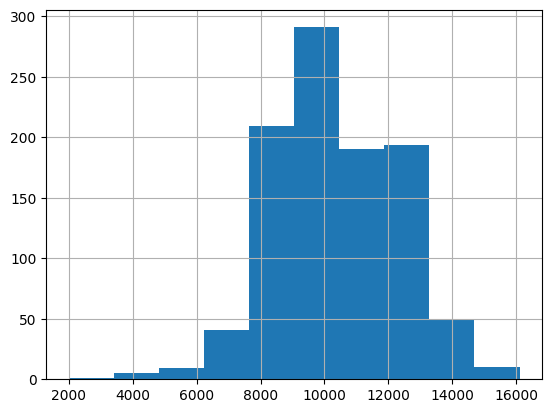

In [39]:
# 二分计算
bin_result = ana.roll_by_target_bin(
    target,
    n_samples=1000
)

print("bin_search:", bin_result["total_cost"].mean())

# 画图
bin_result["total_cost"].hist()